tensor(7.0505)


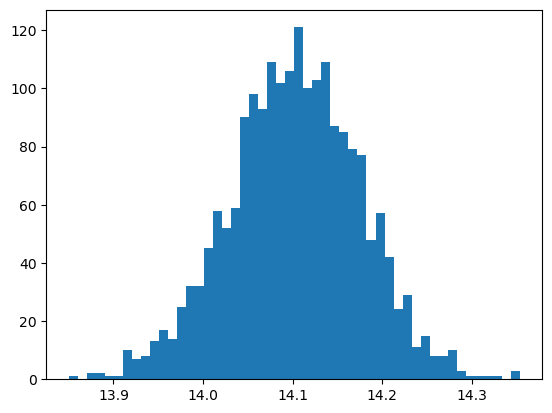

In [2]:
import numpy as np
import pandas as pd
import pyro.distributions as dist
import matplotlib.pyplot as plt
import torch

alpha_precision_concentration = 2
alpha_precision_rate=0.01

alpha_prior = dist.Gamma(2, 0.4).sample()
print(alpha_prior)
alpha_precision = dist.Gamma(concentration=alpha_precision_concentration, rate=alpha_precision_rate).sample()

alpha = dist.LogNormal(torch.log(alpha_prior * 2), 1 / alpha_precision).sample([2000])
# alpha = dist.LogNormal(torch.log(torch.tensor(2.)), 0.05).sample([2000])
plt.hist(alpha.numpy(), bins = 50);

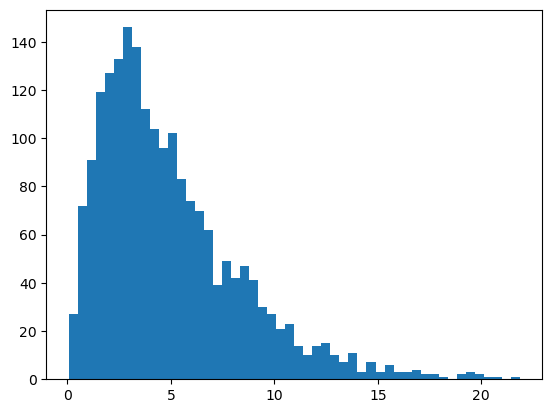

In [3]:
alpha_prior = dist.Gamma(2, 0.4).sample([2000])
plt.hist(alpha_prior.numpy(), bins = 50);

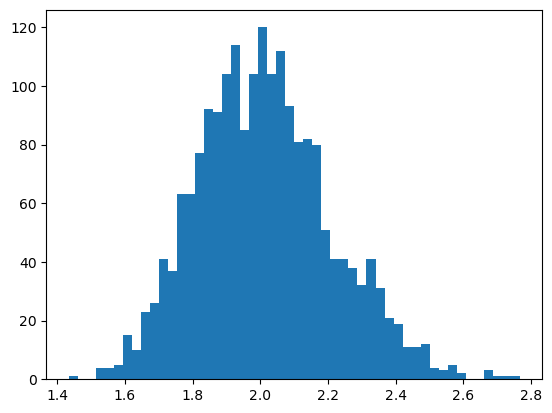

In [4]:
alpha = dist.LogNormal(torch.log(torch.tensor(2.)), 1/10).sample([2000])
plt.hist(alpha.numpy(), bins = 50);

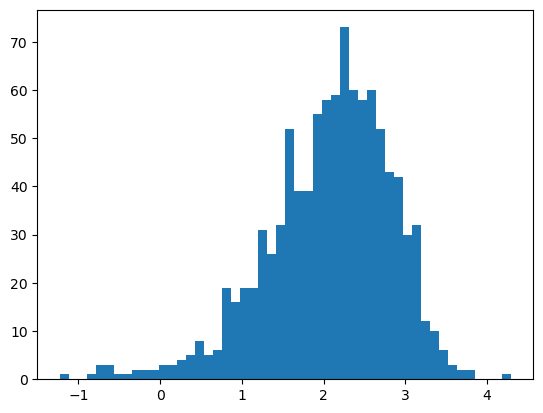

In [5]:
alpha_prior = dist.Gamma(2, 0.4).sample([1000])
# plt.hist(alpha_prior.numpy(), bins = 50)
# plt.hist(torch.log(2.*alpha_prior).numpy(), bins = 50)
alpha = dist.Normal(torch.log(2.*alpha_prior), 0.005).sample()
plt.hist(alpha.numpy(), bins = 50);

### Check betabinomial

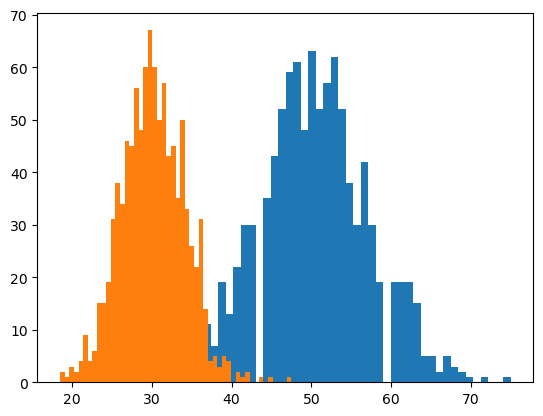

In [6]:
phi = 0.5
k = 100
a = phi * k
b = (1-phi) * k
p = 0.6
n = 100
betabin = dist.BetaBinomial(a, b, n).sample([1000])
beta = dist.Beta(a, b).sample([1000])*dist.Binomial(probs = p, total_count=n).sample([1000])

plt.hist(betabin.numpy(), bins = 50);
plt.hist(beta.numpy(), bins = 50);

### Check betas_subclone_n_samples (i.e. k_beta)

In [3]:
prior_lims_clonal=[0.1, 100000.]
prior_overdispersion = dist.Uniform(prior_lims_clonal[0], prior_lims_clonal[1]).sample()
print(prior_overdispersion)
prec_overdispersion = dist.Gamma(3.,1.).sample()
print(prec_overdispersion)
k_beta = dist.LogNormal(torch.log(prior_overdispersion), 1 / prec_overdispersion).sample()
print(k_beta)

tensor(58869.6797)
tensor(2.6359)
tensor(55994.1484)


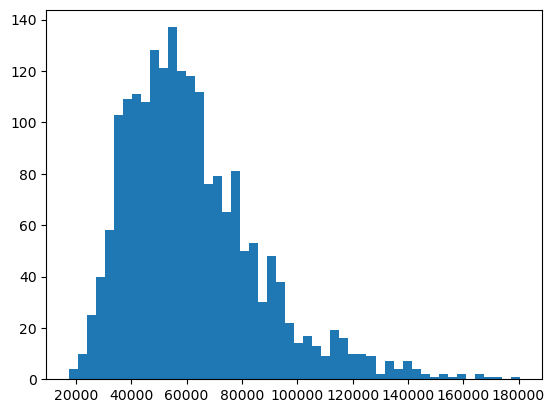

In [4]:
k_beta = dist.LogNormal(torch.log(prior_overdispersion), 1 / prec_overdispersion).sample([2000])
plt.hist(k_beta, bins = 50);

In [5]:
precision = torch.tensor(20.)  # Increase this value to reduce variance

# Calculate the standard deviation in the log space
std_dev = 1 / torch.sqrt(precision)
print(std_dev)

tensor(0.2236)


tensor(4.6052)
tensor(0.0012)


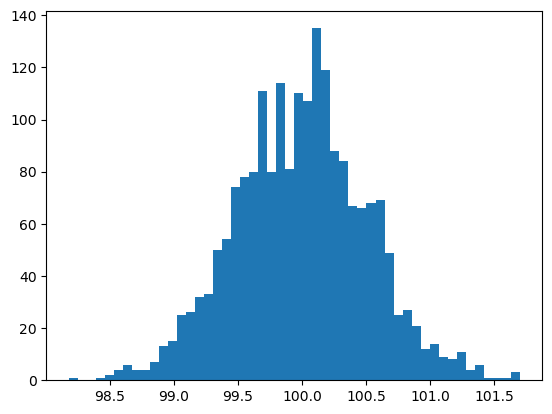

In [10]:
# My k_beta
prior_overdispersion = torch.tensor(100.)
print(torch.log(prior_overdispersion))
prec_overdispersion = torch.tensor(800.)
print(1/prec_overdispersion)
k_beta = dist.LogNormal(torch.log(prior_overdispersion), 0.005).sample([2000])
plt.hist(k_beta, bins = 50);

### Clonal and subclonal means (i.e., phi_beta)

tensor([ 0.0123,  0.0088,  0.0005,  ..., -0.0042, -0.0023, -0.0037])


(array([45., 31., 40., 44., 48., 45., 41., 40., 36., 29., 37., 41., 39.,
        38., 42., 32., 40., 31., 42., 45., 42., 42., 41., 33., 57., 40.,
        34., 52., 47., 35., 53., 31., 36., 38., 50., 27., 29., 32., 44.,
        31., 55., 39., 37., 48., 52., 37., 33., 45., 41., 33.]),
 array([-0.00668947, -0.00628969, -0.00588991, -0.00549013, -0.00509034,
        -0.00469056, -0.00429078, -0.003891  , -0.00349121, -0.00309143,
        -0.00269165, -0.00229187, -0.00189209, -0.0014923 , -0.00109252,
        -0.00069274, -0.00029296,  0.00010683,  0.00050661,  0.00090639,
         0.00130617,  0.00170596,  0.00210574,  0.00250552,  0.0029053 ,
         0.00330509,  0.00370487,  0.00410465,  0.00450443,  0.00490421,
         0.005304  ,  0.00570378,  0.00610356,  0.00650334,  0.00690313,
         0.00730291,  0.00770269,  0.00810247,  0.00850226,  0.00890204,
         0.00930182,  0.0097016 ,  0.01010139,  0.01050117,  0.01090095,
         0.01130073,  0.01170051,  0.0121003 ,  0.01250008,

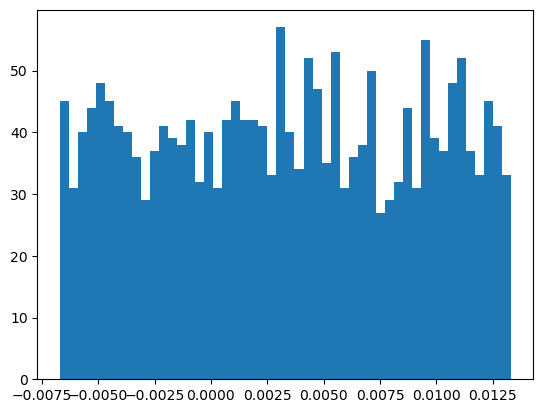

In [6]:
# SUBCLONES
epsilon_ccf = 0.01
ccf_adjust = 0.5
purity = 1
subclonal_ccf = dist.Uniform(0.000001, 0.99999).sample()
adj_ccf = subclonal_ccf * ccf_adjust * purity
k_means = dist.Uniform(adj_ccf - epsilon_ccf, adj_ccf + epsilon_ccf).sample([2000])
print(k_means)
plt.hist(k_means.numpy(), bins = 50);

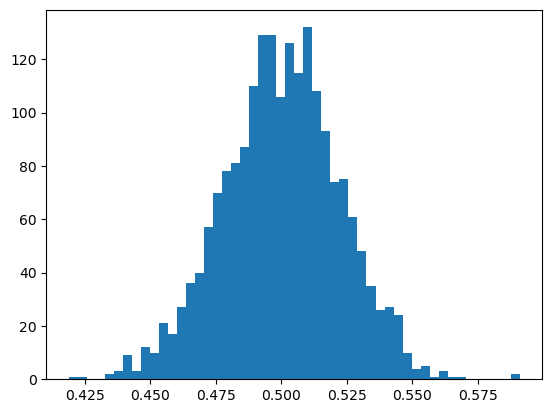

In [11]:
# CLONES
number_of_trials_clonal_mean = 500
theo_clonal_means = 0.5
bm_11 = number_of_trials_clonal_mean*theo_clonal_means
bm_21 = number_of_trials_clonal_mean-bm_11
phi_beta = dist.Beta(bm_11, bm_21).sample([2000])
plt.hist(phi_beta.numpy(), bins = 50);

### Counts_clones

In [36]:
theo_clonal_list = {
    "1:0" : 1,
    "1:1" : 1,
    "2:0" : 2,
    "2:1" : 2,
    "2:2" : 2
}

karyos = list(['1:1'])
theoretical_num_clones = [theo_clonal_list[kr] for kr in karyos]
print(theoretical_num_clones)
counts_clones = dict()
for i in theoretical_num_clones:
    counts_clones[i] = counts_clones.get(i, 0) + 1
counts_clones # conta quanti cariotipi hanno 1 o 2 alleli. Nel mio caso ho 1 cariotipo con 1 allele.

[1]


{1: 1}

In [37]:
index_1 = [i for i, j in enumerate(theoretical_num_clones) if j == 1] # ritorna l'indice degli elementi il cui valore è 1
index_2 = [i for i, j in enumerate(theoretical_num_clones) if j == 2]# ritorna l'indice degli elementi il cui valore è 1

print(index_1)
print(index_2)

[0]
[]


In [39]:
for i, j in enumerate(theoretical_num_clones):
    print(i,j) # index 0, value 1

0 1


In [47]:
theo_clonal_means_list = {
    "1:0" : torch.tensor(0.9999),
    "1:1" : torch.tensor(0.5),
    "2:0" : torch.tensor([0.5,0.9999]),
    "2:1" : torch.tensor([1/3.,2/3.]),
    "2:2" : torch.tensor([0.25,0.5])
}
theoretical_clonal_means = [theo_clonal_means_list[kr] * 1 for kr in karyos]
print(theoretical_clonal_means)
a_1_theo = torch.tensor([theoretical_clonal_means[i] for i in index_1]).reshape([1, counts_clones[1]])
print(a_1_theo)

[tensor(0.5000)]
tensor([[0.5000]])


In [51]:
a11 = a_1_theo.reshape([1 , len(index_1)])
idx1 = 0
dist.Delta(a11[:, idx1])

Delta(v: tensor([0.5000]), log_density: tensor([0.]))